In [ ]:
#!unzip linear_regression.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from linear_regression import SGDRegressor,LinearRegression,GridSearch,SSE

### Load data

In [ ]:
filepath = './data.npz'

def load_data(filepath):
    def f(x1,x2):
        x1 = x1.reshape((-1,1))
        x2 = x2.reshape((-1,1))
        return np.concatenate([x1,x2],axis = 1)
    data = np.load(filepath)
    X = f(data['x1'],data['x2'])
    X_test = f(data['x1_test'],data['x2_test'])
    
    return (X,data['y']),(X_test,data['y_test'])

(X,y),(X_test,y_test) = load_data(filepath)
print(f'X.shape= {X.shape} -- y.shape= {y.shape}')
print(f'X_test.shape= {X_test.shape} -- y_test.shape= {y_test.shape}')

X.shape= (8000, 2) -- y.shape= (8000,)
X_test.shape= (2000, 2) -- y_test.shape= (2000,)


### Training Linear Regression using normal equation with degree=1

In [ ]:
lin_reg = LinearRegression(degree=1)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -1513.1820648210169
Test rmse score: -2544.0872583081773
Train SSE: 18317759690.36797
Test SSE: 12944759955.77204


### Training Linear Regression using normal equation with degree=3

In [ ]:
lin_reg = LinearRegression(degree=3)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -2.10329063769113e-09
Test rmse score: -6.4511651442098415e-09
Train SSE: 3.539065205279329e-14
Test SSE: 8.323506343573597e-14


### Training Linear Regression using normal equation with degree=5

In [ ]:
lin_reg = LinearRegression(degree=3)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -2.10329063769113e-09
Test rmse score: -6.4511651442098415e-09
Train SSE: 3.539065205279329e-14
Test SSE: 8.323506343573597e-14


### It seems using degree=3 does very good on both training and test data
### degree=3 or degree=5 are same

### Using Grid search to find best lambda, degree=1

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4]}
clf_params = {'degree':None}

grid_search = GridSearch(LinearRegression,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001} => mean:-1513.8700202146722 -- std:21.037938961084024
{'lambda_': 0.001} => mean:-1513.8700202097348 -- std:21.03793987870202
{'lambda_': 0.01} => mean:-1513.8700201603929 -- std:21.037949054881842
{'lambda_': 0.1} => mean:-1513.8700196699492 -- std:21.038040816545905
{'lambda_': None} => mean:-1513.8700202152206 -- std:21.037938859126484
{'lambda_': 1} => mean:-1513.8700150631976 -- std:21.038958419990152
{'lambda_': 100.0} => mean:-1513.872801523405 -- std:21.13974839143138
{'lambda_': 1000.0} => mean:-1514.1876448188527 -- std:22.042783079267654
{'lambda_': 10000.0} => mean:-1538.227970276537 -- std:29.86281075115457


In [ ]:
 best,best_mean_score

({'best_mean_score': -1513.8700150631976,
  'lambda_': 1,
  'scores': [-1525.2727720226092,
   -1545.3111190879383,
   -1507.6998687390055,
   -1481.6754597050751,
   -1509.3908557613595]},
 -1513.8700150631976)

In [ ]:
lin_reg = LinearRegression(degree=1,lambda_=1)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -1513.1820650349068
Test rmse score: -2544.0987962845034
Train SSE: 18317759695.54644
Test SSE: 12944877370.51252


### Using Grid search to find best lambda, degree=3

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4]}
clf_params = {'degree':3}

grid_search = GridSearch(LinearRegression,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001} => mean:-2.0501842807592193e-07 -- std:6.112634312737054e-09
{'lambda_': 0.001} => mean:-2.0620118042572972e-06 -- std:5.373613032640176e-08
{'lambda_': 0.01} => mean:-2.061466848072127e-05 -- std:5.405390677107343e-07
{'lambda_': 0.1} => mean:-0.00020609117497951839 -- std:5.41557862243761e-06
{'lambda_': None} => mean:-2.801481010930713e-09 -- std:8.016804849494081e-10
{'lambda_': 1} => mean:-0.002055080565504343 -- std:5.393731931374226e-05
{'lambda_': 100.0} => mean:-0.15682193280254564 -- std:0.0036989536085196974
{'lambda_': 1000.0} => mean:-0.5068112764761196 -- std:0.009066329790036765
{'lambda_': 10000.0} => mean:-0.7872285599870116 -- std:0.010790570958996833


In [ ]:
 best,best_mean_score

({'best_mean_score': -2.801481010930713e-09,
  'lambda_': None,
  'scores': [-3.864609317854727e-09,
   -3.278850311645886e-09,
   -3.030550730783084e-09,
   -2.2610645593866254e-09,
   -1.572330134983244e-09]},
 -2.801481010930713e-09)

In [ ]:
lin_reg = LinearRegression(degree=3,lambda_=None)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -2.10329063769113e-09
Test rmse score: -6.4511651442098415e-09
Train SSE: 3.539065205279329e-14
Test SSE: 8.323506343573597e-14


### Using Grid search to find best lambda, degree=5

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4]}
clf_params = {'degree':3}

grid_search = GridSearch(LinearRegression,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001} => mean:-2.0590366757803476e-07 -- std:2.6239269604749615e-09
{'lambda_': 0.001} => mean:-2.0586546999521446e-06 -- std:2.0188993019701405e-08
{'lambda_': 0.01} => mean:-2.0610740028067526e-05 -- std:2.0202675787273217e-07
{'lambda_': 0.1} => mean:-0.00020605750976539875 -- std:2.015831587926074e-06
{'lambda_': None} => mean:-1.456214517202294e-09 -- std:4.734068723862584e-10
{'lambda_': 1} => mean:-0.0020547492283368583 -- std:2.0091506791611397e-05
{'lambda_': 100.0} => mean:-0.15681205529611117 -- std:0.0015167120964932237
{'lambda_': 1000.0} => mean:-0.5068988531884699 -- std:0.005609666236021318
{'lambda_': 10000.0} => mean:-0.7876452465808452 -- std:0.01669196489950356


In [ ]:
best,best_mean_score

({'best_mean_score': -1.456214517202294e-09,
  'lambda_': None,
  'scores': [-1.7278367078670415e-09,
   -7.662992375359558e-10,
   -1.0114344364744667e-09,
   -1.904055367896122e-09,
   -1.8714468362378835e-09]},
 -1.456214517202294e-09)

In [ ]:
lin_reg = LinearRegression(degree=5,lambda_=None)
lin_reg.fit(X,y)
lin_reg.score(X_test,y_test)

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

Train rmse score: -1.2825796303833867e-05
Test rmse score: -0.00016752702774142084
Train SSE: 1.3160084066195076e-06
Test SSE: 5.613061004774957e-05


### Training Linear Regression using gradient decsent with degree=1

In [ ]:
lin_reg = SGDRegressor(learning_rate=0.01,epochs=50_000,verbose=1,clipnorm=1,degree=1)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=1868.627685546875 - Loss=1745884.75


Train rmse score: -1868.6277086236612
Test rmse score: -3207.133757557765
Train SSE: 27934156107.488914
Test SSE: 20571413877.733177


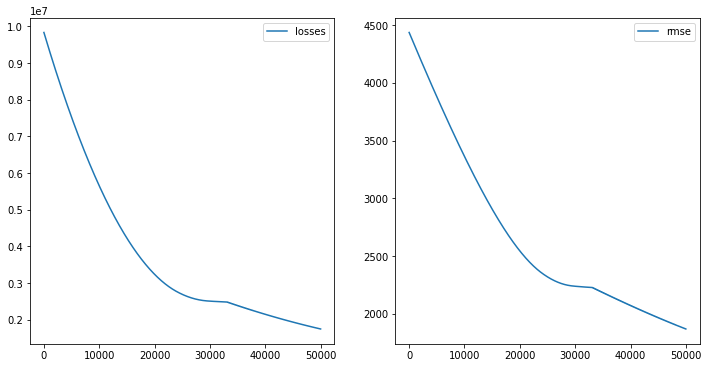

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

### Training Linear Regression using gradient decsent with degree=3

In [ ]:
lin_reg = SGDRegressor(learning_rate=0.01,epochs=50_000,verbose=1,clipnorm=1,degree=3)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=17.159727096557617 - Loss=147.2281036376953


Train rmse score: -17.15972646348508
Test rmse score: -22.803970671288504
Train SSE: 2355649.6984130414
Test SSE: 1040042.1567539725


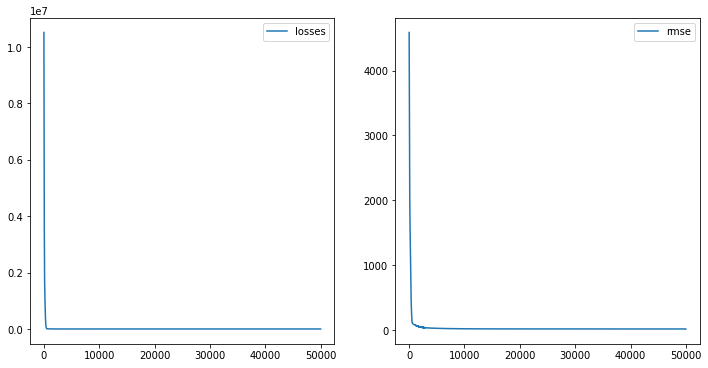

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

### Training Linear Regression using gradient decsent with degree=5

In [ ]:
lin_reg = SGDRegressor(learning_rate=0.01,epochs=50_000,verbose=1,clipnorm=1,degree=5)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=5085.5341796875 - Loss=12931328.0


Train rmse score: -5085.534030816636
Test rmse score: -9350.328348809537
Train SSE: 206901251028.7528
Test SSE: 174857280461.10254


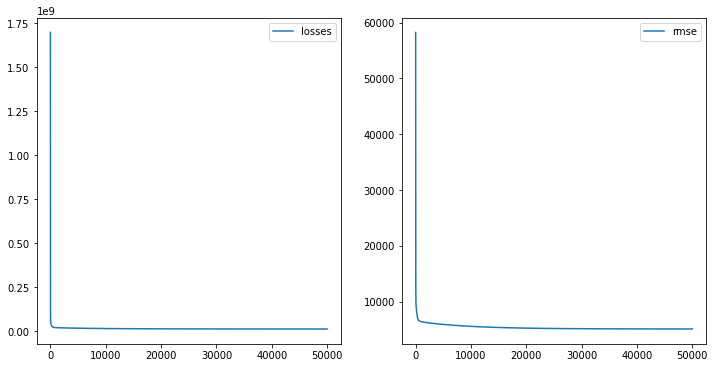

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

### Using Grid search to find best lambda, and learning_rate=1e-2 , degree=1

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4]}
clf_params = {'epochs':50_000,'learning_rate':1e-2,'verbose':0,'clipnorm':1,'degree':1}

grid_search = GridSearch(SGDRegressor,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001} => mean:-1867.8866896024076 -- std:30.864918493418042
{'lambda_': 0.001} => mean:-1869.0537944471957 -- std:29.74996958219415
{'lambda_': 0.01} => mean:-1868.2841382042625 -- std:32.06248684214018
{'lambda_': 0.1} => mean:-1866.6474984053336 -- std:31.717353412035866
{'lambda_': None} => mean:-1868.8739387101439 -- std:30.753444555289782
{'lambda_': 1} => mean:-1845.6411300443065 -- std:31.755270542970717
{'lambda_': 100.0} => mean:-2826.2809609342394 -- std:41.3379064648455
{'lambda_': 1000.0} => mean:-3271.2360445229656 -- std:41.98683148906002
{'lambda_': 10000.0} => mean:-3371.639183400281 -- std:42.43589845370103


In [ ]:
best,best_mean_score

({'best_mean_score': -1845.6411300443065,
  'lambda_': 1,
  'scores': [-1888.69219927294,
   -1796.5512960653002,
   -1867.9504159854653,
   -1846.128818635736,
   -1828.8829202620911]},
 -1845.6411300443065)

In [ ]:
lin_reg = SGDRegressor(learning_rate=1e-2,lambda_=best['lambda_'],
                       epochs=50_000,degree=1,verbose=1,clipnorm=1.)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=1845.4281005859375 - Loss=1702802.5


Train rmse score: -1845.428115329106
Test rmse score: -3194.425555506342
Train SSE: 27244839430.777092
Test SSE: 20408709259.344


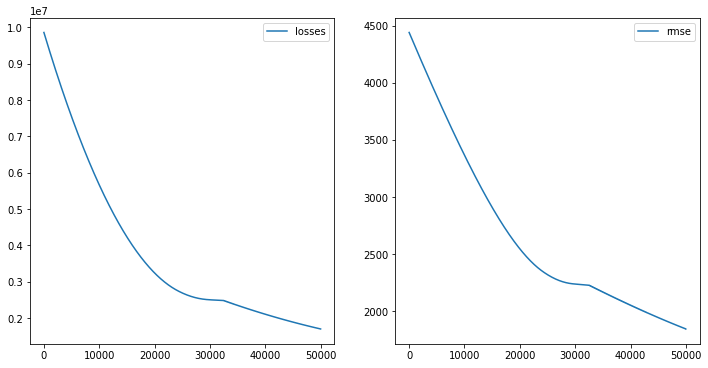

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

### Using Grid search to find best lambda, and learning_rate , degree=3

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4]}
clf_params = {'epochs':50_000,'learning_rate':1e-2,'verbose':0,'clipnorm':1,'degree':3}

grid_search = GridSearch(SGDRegressor,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001} => mean:-17.44197809258511 -- std:0.40409358755937663
{'lambda_': 0.001} => mean:-17.272633833910724 -- std:0.5213558392449833
{'lambda_': 0.01} => mean:-17.580758889624143 -- std:0.6739409124986038
{'lambda_': 0.1} => mean:-16.8857391509424 -- std:0.28083230179970414
{'lambda_': None} => mean:-17.502190546178138 -- std:1.032440842596123
{'lambda_': 1} => mean:-17.48084553445109 -- std:1.060624132935097
{'lambda_': 100.0} => mean:-18.517646063406453 -- std:0.6185551664044969
{'lambda_': 1000.0} => mean:-38.6865085063152 -- std:1.388785615974543
{'lambda_': 10000.0} => mean:-119.18487512794582 -- std:3.718503215587899


In [ ]:
best,best_mean_score

({'best_mean_score': -16.8857391509424,
  'lambda_': 0.1,
  'scores': [-16.562333898451858,
   -17.17781418571574,
   -17.18164969017655,
   -16.955773858770844,
   -16.551124121597002]},
 -16.8857391509424)

In [ ]:
lin_reg = SGDRegressor(learning_rate=1e-2,lambda_=best['lambda_'],
                       epochs=50_000,degree=3,verbose=1,clipnorm=1.)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=16.811494827270508 - Loss=141.3131866455078


Train rmse score: -16.81149545147725
Test rmse score: -23.809498155432088
Train SSE: 2261011.0345203215
Test SSE: 1133784.404827048


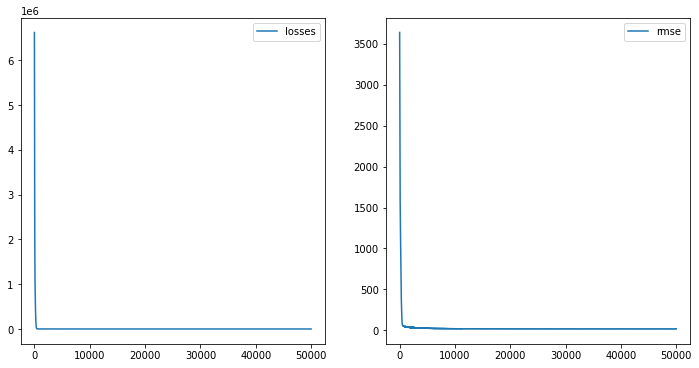

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))

### Using Grid search to find best lambda, and learning_rate , degree=5

In [ ]:
param_grid = {'lambda_':[1e-4,1e-3,1e-2,1e-1,None,1,1e2,1e3,1e4],'learning_rate':[1e-6,1e-5,1e-4,1e-3,1e-2,]}
clf_params = {'epochs':50_000,'verbose':0,'clipnorm':1,'degree':5}

grid_search = GridSearch(SGDRegressor,cv=5,n_jobs=-1,param_grid=param_grid,clf_params=clf_params)
best,best_mean_score=grid_search.fit(X,y)

{'lambda_': 0.0001, 'learning_rate': 1e-06} => mean:-147168.28983927425 -- std:103550.79425868552
{'lambda_': 0.0001, 'learning_rate': 1e-05} => mean:-2425.865101585743 -- std:1397.5894961448632
{'lambda_': 0.0001, 'learning_rate': 0.0001} => mean:-438.00736042656246 -- std:127.37157868866757
{'lambda_': 0.0001, 'learning_rate': 0.001} => mean:-754.260512377304 -- std:73.62886307006545
{'lambda_': 0.0001, 'learning_rate': 0.01} => mean:-4490.024457073358 -- std:752.9448644638527
{'lambda_': 0.001, 'learning_rate': 1e-06} => mean:-112787.09130081639 -- std:96643.08627705387
{'lambda_': 0.001, 'learning_rate': 1e-05} => mean:-6037.392343951633 -- std:4015.705715588296
{'lambda_': 0.001, 'learning_rate': 0.0001} => mean:-534.0846827474676 -- std:141.3678001322585
{'lambda_': 0.001, 'learning_rate': 0.001} => mean:-699.4685060137369 -- std:122.95059132031311
{'lambda_': 0.001, 'learning_rate': 0.01} => mean:-5146.319381712647 -- std:99.31901461240975
{'lambda_': 0.01, 'learning_rate': 1e-0

In [ ]:
best,best_mean_score

({'best_mean_score': -428.39157598850124,
  'lambda_': None,
  'learning_rate': 0.0001,
  'scores': [-337.71107398011884,
   -492.36269997899274,
   -384.8742685952846,
   -408.3666370676046,
   -518.6432003205055]},
 -428.39157598850124)

In [ ]:
lin_reg = SGDRegressor(learning_rate=best['learning_rate'],lambda_=best['lambda_'],
                       epochs=50_000,degree=5,verbose=1,clipnorm=1.)
losses,mets=lin_reg.fit(X,y)

Epoch 50000 => RMSE=679.3653564453125 - Loss=230768.625


Train rmse score: -679.3653263432005
Test rmse score: -2149.1433044794344
Train SSE: 3692297973.099227
Test SSE: 9237633886.377565


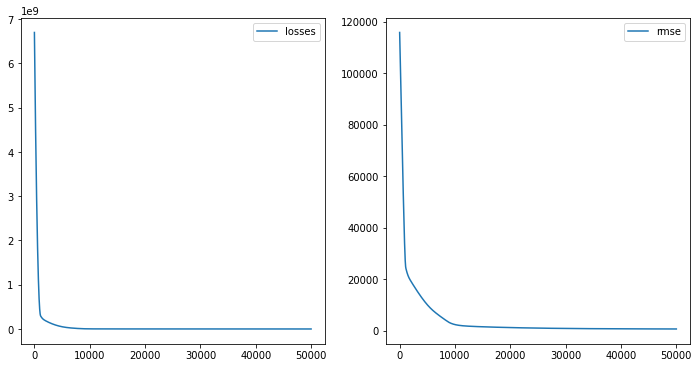

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(losses,label='losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mets,label='rmse')
plt.legend()

print('Train rmse score:',lin_reg.score(X,y))
print('Test rmse score:',lin_reg.score(X_test,y_test))

print('Train SSE:',SSE(y,lin_reg.predict(X)))
print('Test SSE:',SSE(y_test,lin_reg.predict(X_test)))